# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. 

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Betros, Mr. Tannous",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **First, i will find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing dataas well as the number of records with missing value for each column.

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

Column Age has 177 missing values, Cabin has 687 missing values and Embarked column has 2 missing values

In [ ]:
titanic.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Now , i will write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [ ]:

# impute missing value in age column with its mean
titanic['Age'] = titanic['Age'].fillna((titanic['Age'].mean()))

#impute missing values in embarked column with its mode
titanic['Embarked'].mode()
titanic['Embarked'] = titanic['Embarked'].fillna('S')

#impute missing values in cabin column with value 'other'
titanic['Cabin'] = titanic['Cabin'].fillna('other')
#code to print count of missing values in each column after imputation to verify that no missing values are remaining
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **Name of the person who has the 16th most expensive ticket?**

Farthing,Mr.John has the 16th most expensive ticket of 221.779 dollars

In [ ]:
# TODO

#sort values based on fare from highest to lowest and print top 20 
sorted=titanic.sort_values('Fare', ascending=False).head(20)
#reset index in sorted data
sorted=sorted.reset_index()
#fetch name of a person from the sorted data, who has the 16th most expensive ticket 
display(sorted.loc[15,['Name']])





Name    Farthing, Mr. John
Name: 15, dtype: object

### **Out of all the females who survived, what's the name who has the 6th most expensive ticket?**

**Answer**

Baxter, Mrs. James (Helene DeLaudeniere Chaput) has the 6th most expensive ticket of 247.521 dollars

In [ ]:
# TODO
#sorting values based on fare and reseting index
female_survived=titanic.loc[(titanic['Sex']=='female')& (titanic['Survived']==1),['Name','Fare','Sex','Survived']].sort_values('Fare',ascending=False).reset_index()
#printing top 10
female_survived.head(10)
#selecting 6th row of a name column
display(female_survived.loc[5,['Name']])

Name    Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Name: 5, dtype: object

### **Next step is to Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

**Findings**

1)Female (avg 74%) had a much higher chance of survival than men(avg 18.8%).
Females of even third class had higher chance of survival(50%) than males of first class(36.8%). This shows that the sex column dominates over Pclass.

2)In general, First class passenger had a higher chance of survival(62.9%) than the 2nd class(47.2%) followed by the third (24.2%) for both male and female category. As it is obvious from the sex-pclass combination survival rate table, survival rate reduces as we move from class 1 to class 3.

3)Female of first class had the highest chance of survival(96.8%).

**Insights**

Women had a much higher chance of survival — regardless of what class they were in — then men did. That is females were given priority over men when it came to rescuing.

Next important factor in determining the survival rate was class. Passengers of class 1 had a higher chance of survival over class 2  followed by class 3.


In [ ]:
# TODO
#calculation of survival rate for sex and pclass combination
survival_rate_df=titanic.groupby(['Sex','Pclass'])["Survived"].mean().reset_index()
#converting survived value to percentages
survival_rate_df['Survived']=survival_rate_df['Survived'].apply(lambda x: (x *100))
#creating pivot
survival_rate_df.pivot(index='Sex',columns='Pclass', values='Survived')


Pclass,1,2,3
Sex,,,
female,96.808511,92.105263,50.000000
male,36.885246,15.740741,13.544669


In [ ]:
#survival rate for each class(extra calculations)
titanic.groupby(['Pclass'])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
# survival rate for sex type
titanic.groupby(['Sex'])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### ** Let's check If Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

**Findings**

**Based on the distribution for Age** 

People under 15(children) had a higher chance of survival than others.

There were more survivors around age lower than 15, and rarely any survivors around or above age 60.
This shows that the childrens were given preference over others irrespective of the class they were travelling in  while for other age groups their chances of survival were dependent on the other factors such as their sex, class of travel etc. Age is an important factor for passenger below 15.

**Based on the distribution for Fare**

There is a strong correlation between fare and survival rate. People who had paid < $40 had lower chances of survival than others. As we move towards right on the curve that is towards higher fare prices, chances of survival increases. This shows that fare is an important factor in determining one's chance of survival.



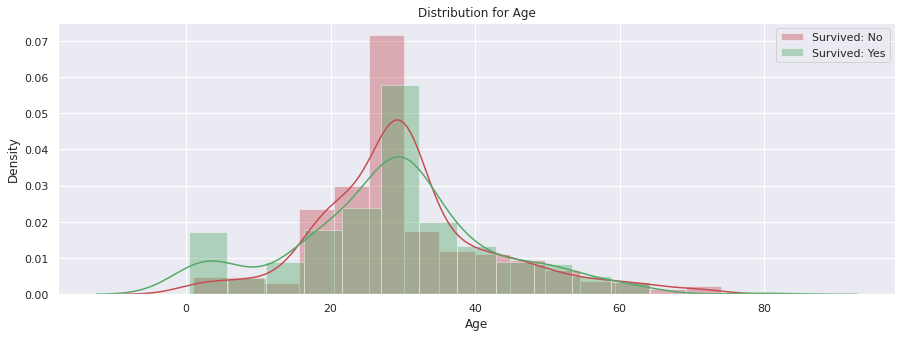

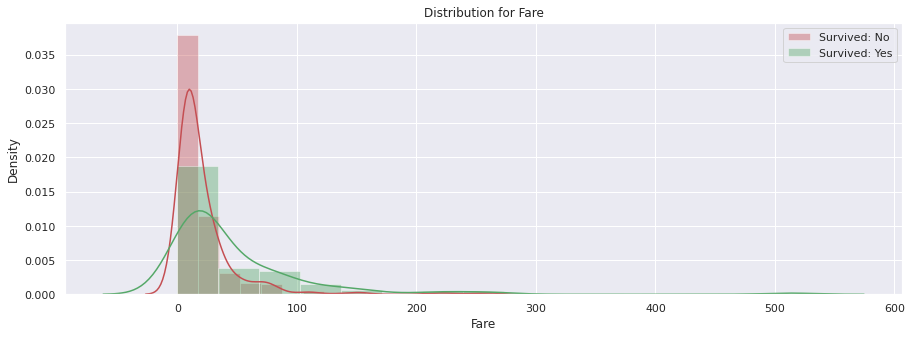

In [ ]:
# TODO

def distplot(feature, frame):
    plt.figure(figsize=(15,5))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'r', label='Survived: No',bins=15,hist=True)
    ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'g', label='Survived: Yes',bins=15,hist=True)
    plt.legend()
    plt.show()

numerical_cols = ['Age', 'Fare']

# distplot to plot the Distribution of Age for Survived and Non-survived users.

distplot('Age', titanic)

# distplot to plot the Distribution of Fare for Survived and Non-survived users.
distplot('Fare', titanic)





### **Let's Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

**Findings**

Siblings and spouse seems to have a negative effect on survival rate. This could be due to other factors such as sex,class etc.
However, with an increase in parents and children upto 3 , survival rate increases.Thai is those with few numbers of parents/children on board had higher survivability.


,SibSp,Survived
0,0,34.539474
1,1,53.588517
2,2,46.428571
3,3,25.000000
4,4,16.666667
5,5,0.000000
6,8,0.000000


,Parch,Survived
0,0,34.365782
1,1,55.084746
2,2,50.000000
3,3,60.000000
4,4,0.000000
5,5,20.000000
6,6,0.000000


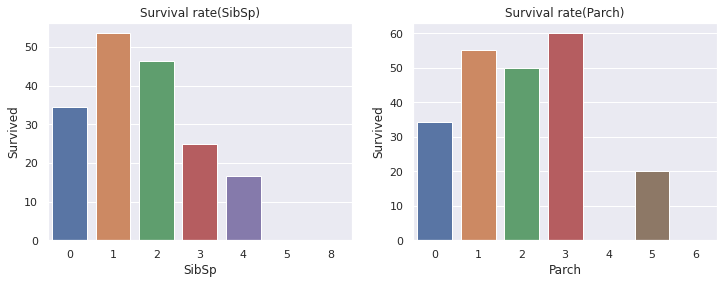

In [ ]:
# TODO
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Survival rate(SibSp)")
axis[1].set_title("Survival rate(Parch)")
#survival rate calculation for SibSp column
Sibsp_df=titanic.groupby(['SibSp'])["Survived"].mean().reset_index()
#converting survived value to percentages
Sibsp_df['Survived']=Sibsp_df['Survived'].apply(lambda x: (x *100))
display(Sibsp_df)

# Plotting survival rate for SibSp column
ax = sns.barplot(x='SibSp', y= 'Survived', data=Sibsp_df, ax=axis[0])
#survival rate calculation for Parch column
Parch_df=titanic.groupby(['Parch'])["Survived"].mean().reset_index()
#converting survived value to percentages
Parch_df['Survived']=Parch_df['Survived'].apply(lambda x: (x *100))
display(Parch_df)
# Plotting survival rate for Parch column
ax = sns.barplot(x='Parch', y= 'Survived', data=Parch_df, ax=axis[1])
#


### ** The correlations between the feature and the target variable _Survived_ and i will be using heatmap to visualize it

**Findings**

1) Sex has the highest correlation of (.54) with the target variable(survived) that is as we increase the value of sex from 0(male) to 1(female) chance of survival increases. This shows that the females had a higher chance of survival than males.

2) Pclass has the second highest correlation(-.34) with the survived variable. As we move from class 1 to class 3, survival rate decreases. That is class 1 had the highest survival rate followed by class 2 and 3.

3) Fare has the third highest correlation (+.26) with survived. With increase in fare, chance of survival increases. Those who have paid higher fare have more chance of survival than others.



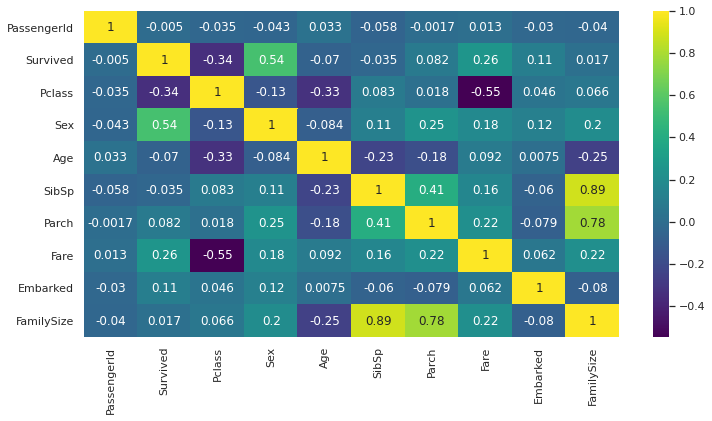

In [ ]:
# TODO
titanic_df=titanic.copy()
titanic_df.Sex.replace(('male','female'), (0,1), inplace = True)
titanic_df.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
plt.figure(figsize=(12, 6))
colormap = plt.cm.viridis
sns.heatmap(titanic_df.corr(  ),annot=True,cmap=colormap)


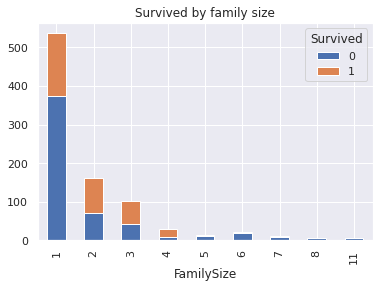

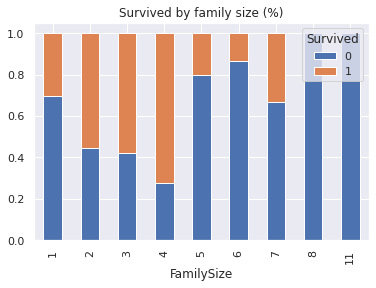

In [ ]:

# Creating another column 'family size' that combines 'SibSp' and 'Parch' column as well as the passenger travelling
# Becasue SibSp and Parch has a very close meaning, "Family" so i combine these 2 features together
for dataset in titanic:
    titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
    
#Plotting count of survived and non survived against family size
pd.crosstab(titanic['FamilySize'], titanic['Survived']).plot(kind='bar', stacked=True, title="Survived by family size")

#Plotting %survived and % non-survived against family size
pd.crosstab(titanic['FamilySize'], titanic['Survived'], normalize='index').plot(kind='bar', stacked=True, title="Survived by family size (%)")


**Finding**

For families from 1 to 4 people, as the family size increases survival rate increase as well. But for families of 5 and up, survival rates is much lower.

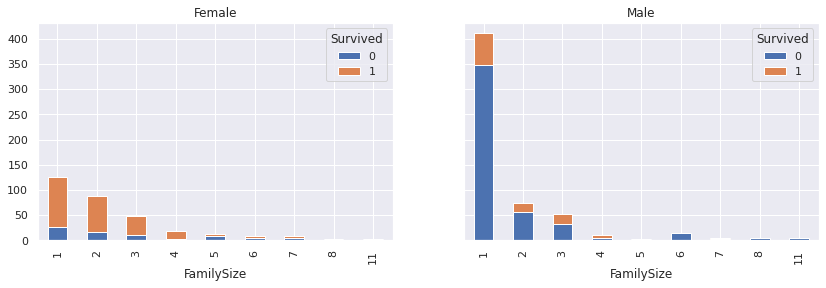

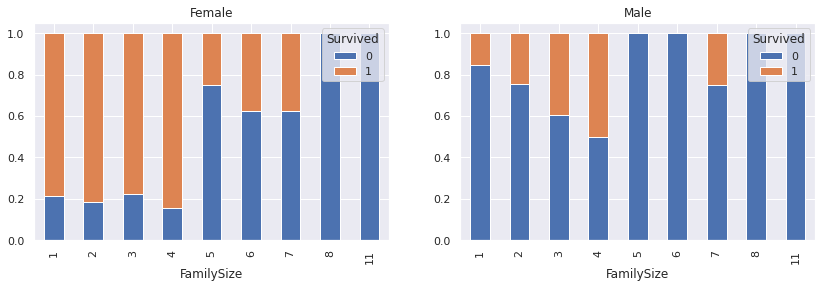

In [ ]:
# further segregate based on sex
female = titanic[titanic['Sex'] == 'female']
male = titanic[titanic['Sex'] == 'male']
 
# Total number
fig, [ax1, ax2] = plt.subplots(1,2, sharey=True)
fig.set_figwidth(14)
pd.crosstab(female['FamilySize'], female['Survived']).plot(kind='bar', stacked=True, title="Female", ax=ax1)
pd.crosstab(male['FamilySize'], male['Survived']).plot(kind='bar', stacked=True, title="Male", ax=ax2)

# Percentage
fig, [ax1, ax2] = plt.subplots(1,2)
fig.set_figwidth(14
)
pd.crosstab(female['FamilySize'], female['Survived'], normalize = 'index').plot(kind='bar', stacked=True, title="Female", ax=ax1)
pd.crosstab(male['FamilySize'], male['Survived'], normalize = 'index').plot(kind='bar', stacked=True, title="Male", ax=ax2)


**Findings**

1) We see that for both sex, family sizes of 5 and up lead to low survival rates.

2) For females in families up to 4, the survival rate is about 80%, regardless of family size.

3) For males in families up to 4, the survival rate increases with family size.This means that the males who were travelling with a family of size upto 4, had gained an advantage over single males.

### ** Now i will build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)?

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
sns.set()

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# grid search for model selection
from sklearn.model_selection import GridSearchCV

# linear regression
from sklearn.linear_model import LinearRegression

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# TODO
train_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
#impute missing values in age column with mean
train_data['Age'] = train_data['Age'].fillna((train_data['Age'].mean()))
#CREATE dummy variable for sex,embarked and Pclass column
pd.get_dummies(train_data["Sex"])

sex_df = pd.get_dummies(train_data["Sex"],drop_first=True)
#embarked = pd.get_dummies(train_data["Embarked"],drop_first=True)
Pclass_df = pd.get_dummies(train_data["Pclass"],drop_first=True)
# concatenate dummy columns to original data
train_data = pd.concat([train_data,Pclass_df,sex_df],axis=1)
# drop unneccesaary columns
train_data.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked","Cabin"],axis=1,inplace=True)
train_data.head()
train_x = train_data.drop("Survived",axis=1)
train_y = train_data.loc[:,'Survived']


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
test_data_set=pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
print(test_data.columns)
#impute missing values in age and fare column with mean value
test_data['Age'] = test_data['Age'].fillna((test_data['Age'].mean()))
test_data['Fare'] = test_data['Fare'].fillna((test_data['Fare'].mean()))
#CREATE dummy variable for sex,embarked and Pclass column
pd.get_dummies(test_data["Sex"])

sex_df2 = pd.get_dummies(test_data["Sex"],drop_first=True)
#embarked = pd.get_dummies(train_data["Embarked"],drop_first=True)
Pclass_df2 = pd.get_dummies(test_data["Pclass"],drop_first=True)
# concatenate dummy columns to original data
test_data = pd.concat([test_data,Pclass_df2,sex_df2],axis=1)
test_data.head()
# drop unneccesaary columns
test_data.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked","Cabin"],axis=1,inplace=True)
test_x = test_data.loc[:,['Age','SibSp','Parch','Fare',2,3,'male']]
test_x
#test_y = test_data.loc[:,'Survived']


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Age,SibSp,Parch,Fare,2,3,male
0,34.50000,0,0,7.8292,0,1,1
1,47.00000,1,0,7.0000,0,1,0
2,62.00000,0,0,9.6875,1,0,1
3,27.00000,0,0,8.6625,0,1,1
4,22.00000,1,1,12.2875,0,1,0
...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,0,1,1
414,39.00000,0,0,108.9000,0,0,0
415,38.50000,0,0,7.2500,0,1,1
416,30.27259,0,0,8.0500,0,1,1


In [ ]:
# logistic regression model
logistic_regression_model=LogisticRegression()
logistic_regression_model.fit(train_x,train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
train_pred_class=logistic_regression_model.predict(train_x)
train_z=pd.DataFrame(train_pred_class,columns=['Survived'])
train_z

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
# use the RL model and make predictions on the training data as well as the test data

# predict probability of survived=1
test_pred_proba=logistic_regression_model.predict_proba(test_x)[:,1]
Result_pred_proba=pd.DataFrame(test_pred_proba,columns=['Survival_Probability'])

# predict survival class on test data 

test_pred_class=logistic_regression_model.predict(test_x)
Result_pred_class=pd.DataFrame(test_pred_class,columns=['Survived'])

Result_x=test_x

# selecting columns that were previously excluded
excluded_cols_df=test_data_set.loc[:,['PassengerId','Pclass','Name','Sex','Ticket','Embarked','Cabin']]

# concatenate survival class prediction, probability of survival with the test dataset
result_df=pd.concat([excluded_cols_df,Result_x,Result_pred_class,Result_pred_proba],axis=1)




In [ ]:
# write output data to check model accuracy on kaggle
result_df[['PassengerId','Survived']].to_csv('titanic_result_set.csv',index=False)


Model accuracy came out to be 76.07 %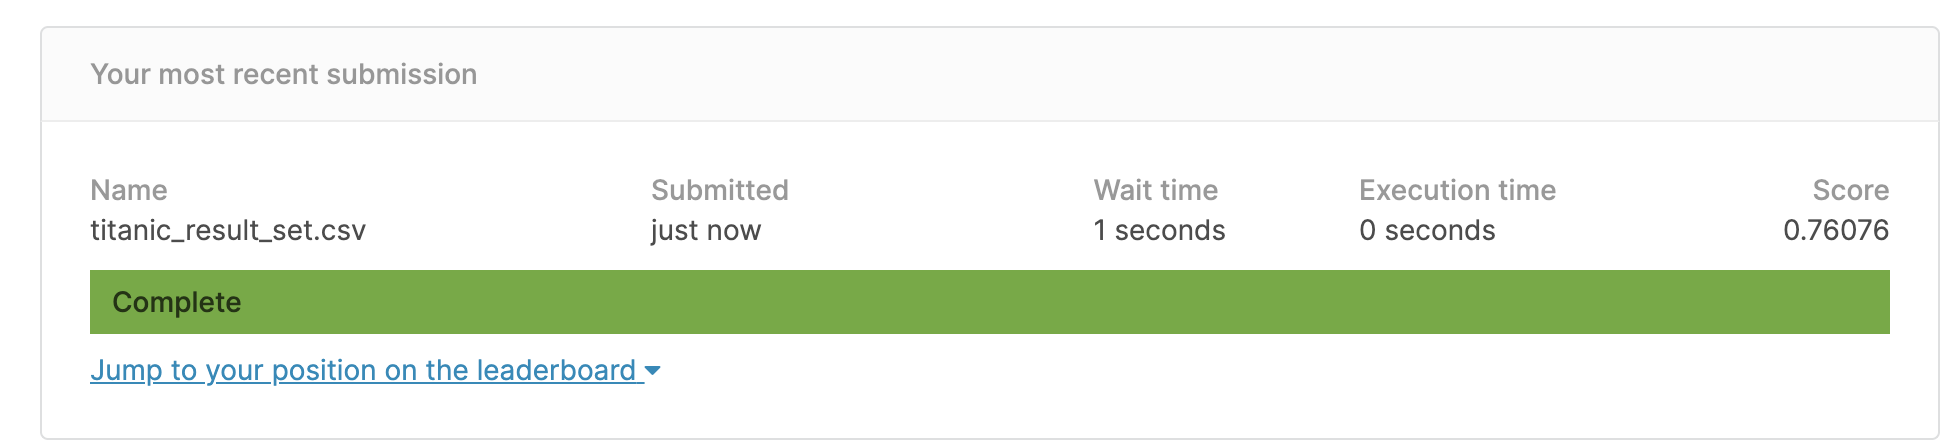

In [ ]:
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
#print("model accuracy on test set: {}".format(accuracy_score(test_y, test_z)))

model accuracy on train set: 0.8013468013468014
